In [18]:
import numpy as np
from matplotlib import pyplot as plt
import lyricwikia
import ipywidgets as wd

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,15
plt.rcParams['font.size'] = 32
# plt.style.use('dark_background')
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['font.family'] = 'Georgia'
dirname, fname = 'growatomata', 'estimates'

In [102]:
lyrics = lyricwikia.get_lyrics('Kanye West', 'New Slaves')
lyrics = lyricwikia.get_lyrics('Taylor Swift', 'Bad blood')
lyrics = lyricwikia.get_lyrics('Led Zeppelin', 'Stairway to Heaven')

lyrics = lyrics.replace('\n',' ')
lyrics = lyrics.replace('\'s','')
lyrics = lyrics.replace('\'t','_t')
lyrics = lyrics.replace('\'m','_m')
lyrics = lyrics.replace('\'d','_d')
lyrics = lyrics.replace('\'e','_e')
lyrics = lyrics.replace('\'a','_a')
lyrics = lyrics.replace('\'','')
lyrics = lyrics.replace(',','')

In [103]:
lyrics

'There a lady who sure all that glitters is gold And she buying a stairway to Heaven When she gets there she knows if the stores are all closed With a word she can get what she came for  And she buying a stairway to Heaven  There a sign on the wall but she wants to be sure Cause you know sometimes words have two meanings In a tree by the brook there a songbird who sings Sometimes all of our thoughts are misgiven  It makes me wonder It makes me wonder  There a feeling I get when I look to the west And my spirit is crying for leaving In my thoughts I have seen rings of smoke through the trees And the voices of those who stand looking  It makes me wonder It really makes me wonder  And it whispered that soon if we all call the tune Then the piper will lead us to reason And a new day will dawn for those who stand long And the forests will echo with laughter  If there a bustle in your hedgerow don_t be alarmed now It just a spring clean for the May Queen Yes there are two paths you can go by

In [113]:
L = lyrics.split()
num_words = len(L)
# print(L)

M = np.zeros((num_words,num_words))
num_unique_words = len(np.unique(L))
print(num_unique_words)

168


In [122]:
words = L
uniqWords = sorted(set(words)) #remove duplicate words and sort
D = {}
max_ct = 0
for word in uniqWords:
    D[word] = words.count(word)
    max_ct = np.maximum(words.count(word), max_ct)
    
for i in range(num_words):
    for j in range(num_words):
        if L[i] == L[j]:
            M[i,j] = D[L[i]]/max_ct
# print(M)

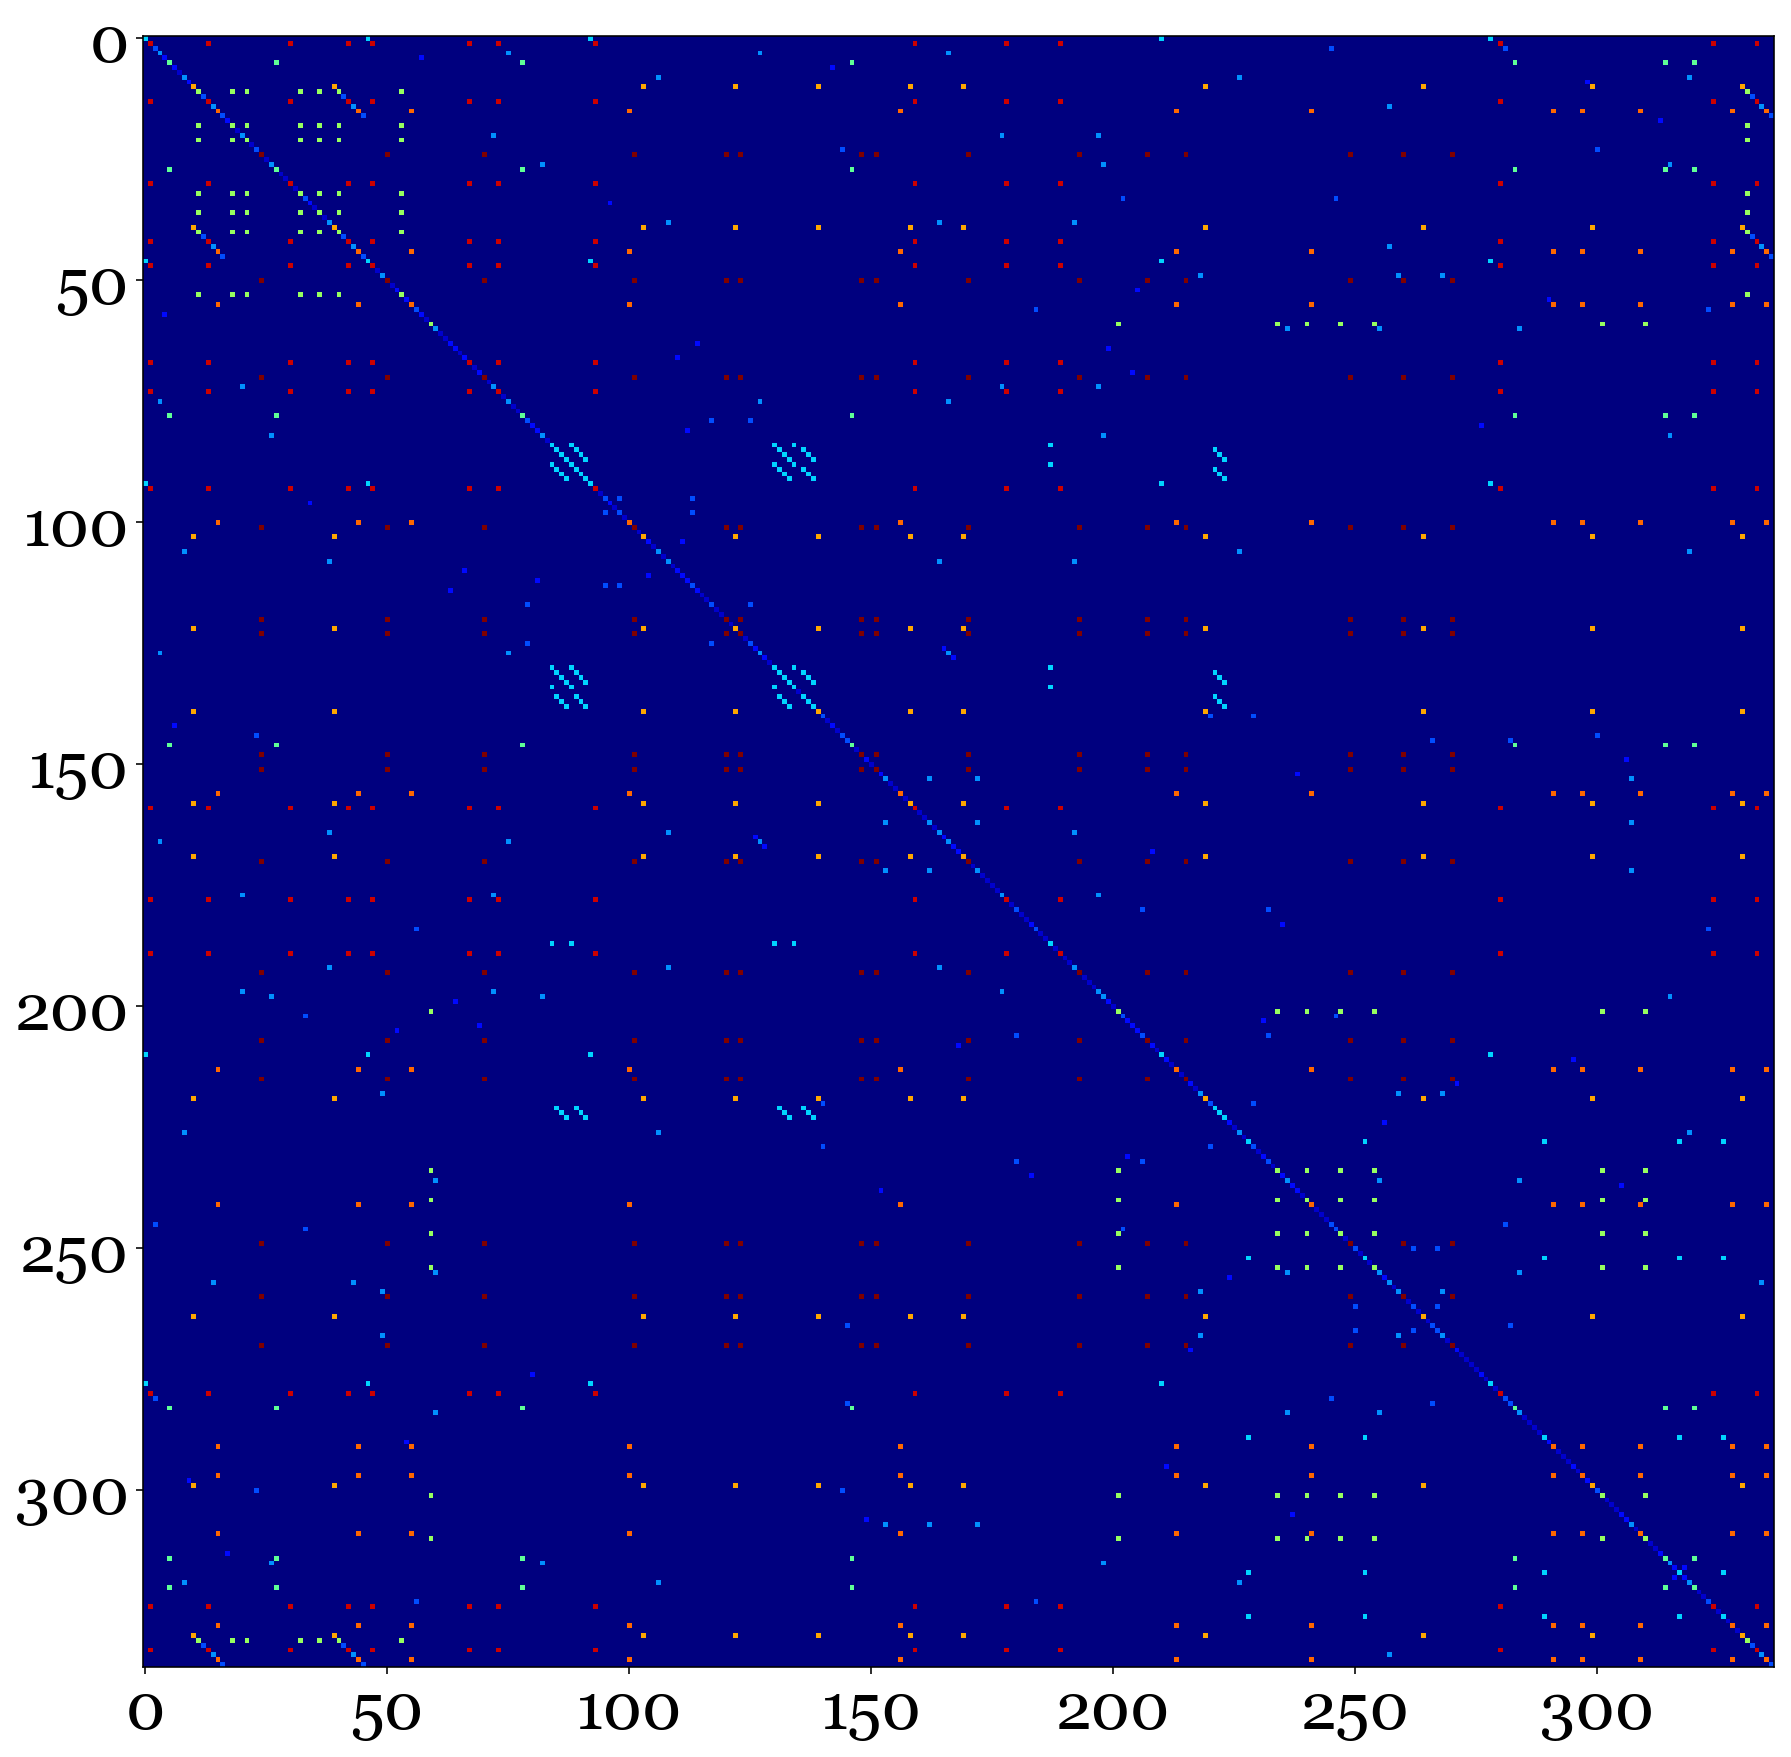

In [123]:
fig, ax1 = plt.subplots(1,1)
plt.imshow(M,cmap='jet')
# ax1.set_xticklabels(L,minor=True, rotation=45, fontsize=12)
plt.show()

In [128]:
def lyric_art(band,song):
    try:
        lyrics = lyricwikia.get_lyrics(band, song)

        lyrics = lyrics.replace('\n',' ')
        lyrics = lyrics.replace('\'s','_s')
        lyrics = lyrics.replace('\'t','_t')
        lyrics = lyrics.replace('\'m','_m')
        lyrics = lyrics.replace('\'d','_d')
        lyrics = lyrics.replace('\'e','_e')
        lyrics = lyrics.replace('\'a','_a')
        lyrics = lyrics.replace('\'','')
        lyrics = lyrics.replace(',','')
        L = lyrics.split()
        num_words = len(L)
        # print(L)

        M = np.zeros((num_words,num_words))
        words = L
        uniqWords = sorted(set(words)) #remove duplicate words and sort
        D = {}
        max_ct = 0
        for word in uniqWords:
            D[word] = words.count(word)
            max_ct = np.maximum(words.count(word), max_ct)

        for i in range(num_words):
            for j in range(num_words):
                if L[i] == L[j]:
                    M[i,j] = D[L[i]]/max_ct
        
        fig, ax1 = plt.subplots(1,1)
        plt.imshow(M,cmap='jet')
        # ax1.set_xticklabels(L,minor=True, rotation=45, fontsize=12)
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        plt.show()            
        
    except:
        print('try again!')

In [129]:
wd.interact(lyric_art, band=wd.Text(value='Kanye West'), song=wd.Text(value='Good Morning'))

interactive(children=(Text(value='Kanye West', description='band'), Text(value='Good Morning', description='so…

<function __main__.lyric_art>